In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [3]:
df=pd.read_csv('YALE-SPCOMP.csv')

In [4]:
df=df[['Year','S&P Composite']]

In [5]:
df.dtypes

Year              object
S&P Composite    float64
dtype: object

In [6]:
print(df['Year'].min(), df['Year'].max())

1871-01-31 2019-12-31


In [7]:
df['Year'] = pd.to_datetime(df['Year'])

In [8]:
df = df.set_index('Year')
df.index

DatetimeIndex(['1871-01-31', '1871-02-28', '1871-03-31', '1871-04-30',
               '1871-05-31', '1871-06-30', '1871-07-31', '1871-08-31',
               '1871-09-30', '1871-10-31',
               ...
               '2019-03-31', '2019-04-30', '2019-05-31', '2019-06-30',
               '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31',
               '2019-11-30', '2019-12-31'],
              dtype='datetime64[ns]', name='Year', length=1788, freq=None)

In [9]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df['S&P Composite'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 4.749445
p-value: 1.000000


In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

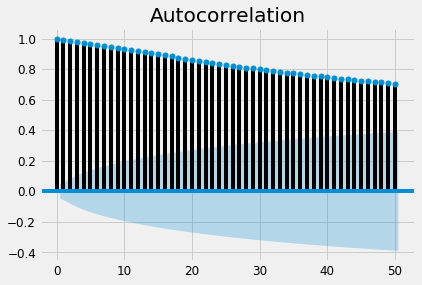

In [11]:
plot_acf(df['S&P Composite'], lags=50)
plt.show()

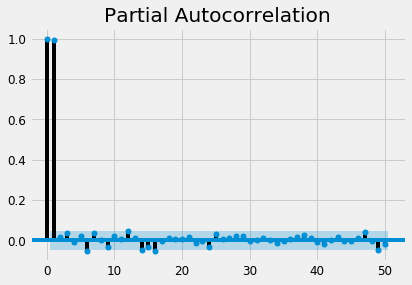

In [12]:
plot_pacf(df['S&P Composite'], lags=50)
plt.show()

In [13]:
df1=df.diff().replace(np.NaN,0)

In [14]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df1['S&P Composite'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -6.429862
p-value: 0.000000


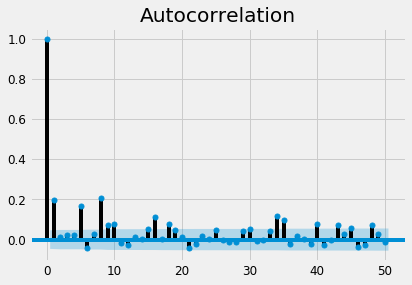

In [15]:
plot_acf(df1['S&P Composite'], lags=50)
plt.show()

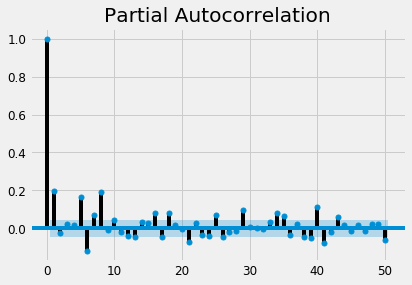

In [16]:
plot_pacf(df1['S&P Composite'], lags=50)
plt.show()

In [18]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df, order=(2,2,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:       D2.S&P Composite   No. Observations:                 1786
Model:                 ARIMA(2, 2, 0)   Log Likelihood               -8102.028
Method:                       css-mle   S.D. of innovations             22.587
Date:                Thu, 23 Jan 2020   AIC                          16212.057
Time:                        10:20:25   BIC                          16234.008
Sample:                    03-31-1871   HQIC                         16220.163
                         - 12-31-2019                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.0559      0.293      0.191      0.849      -0.518       0.630
ar.L1.D2.S&P Composite    -0.5129      0.023    -22.777      0.000      -0.557      -0.469
ar.L

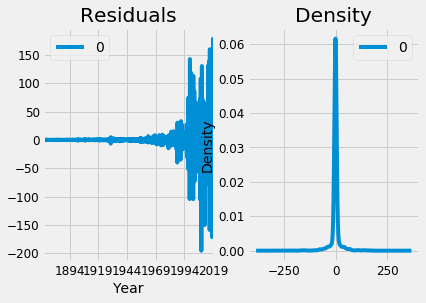

In [19]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

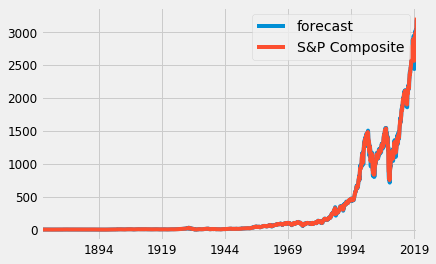

In [20]:
model_fit.plot_predict(dynamic=False)
plt.show()

In [21]:
from statsmodels.tsa.stattools import acf
test = df[1700:]
train = df[0:1700]

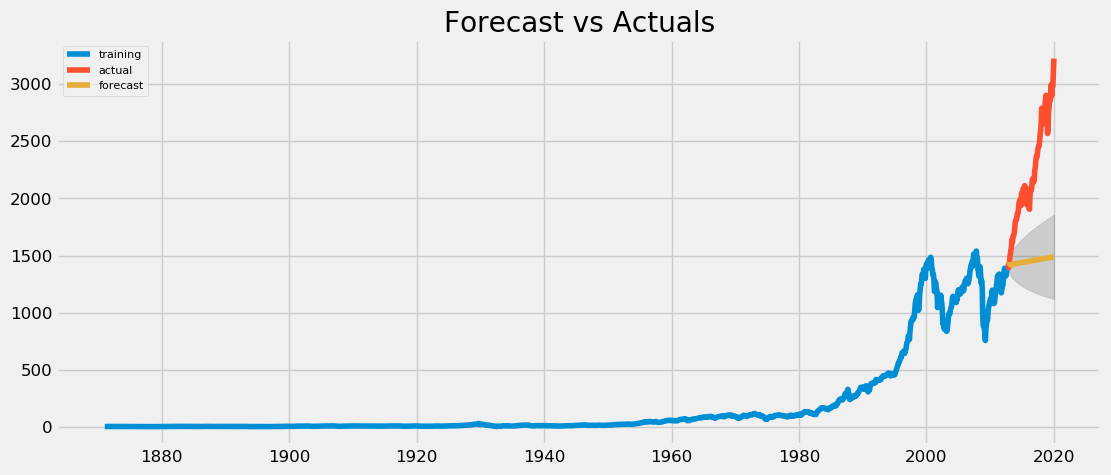

In [30]:
model = ARIMA(train, order=(1,1, 0))  
fitted = model.fit(disp=-1)  
fc, se, conf = fitted.forecast(88, alpha=0.05)
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

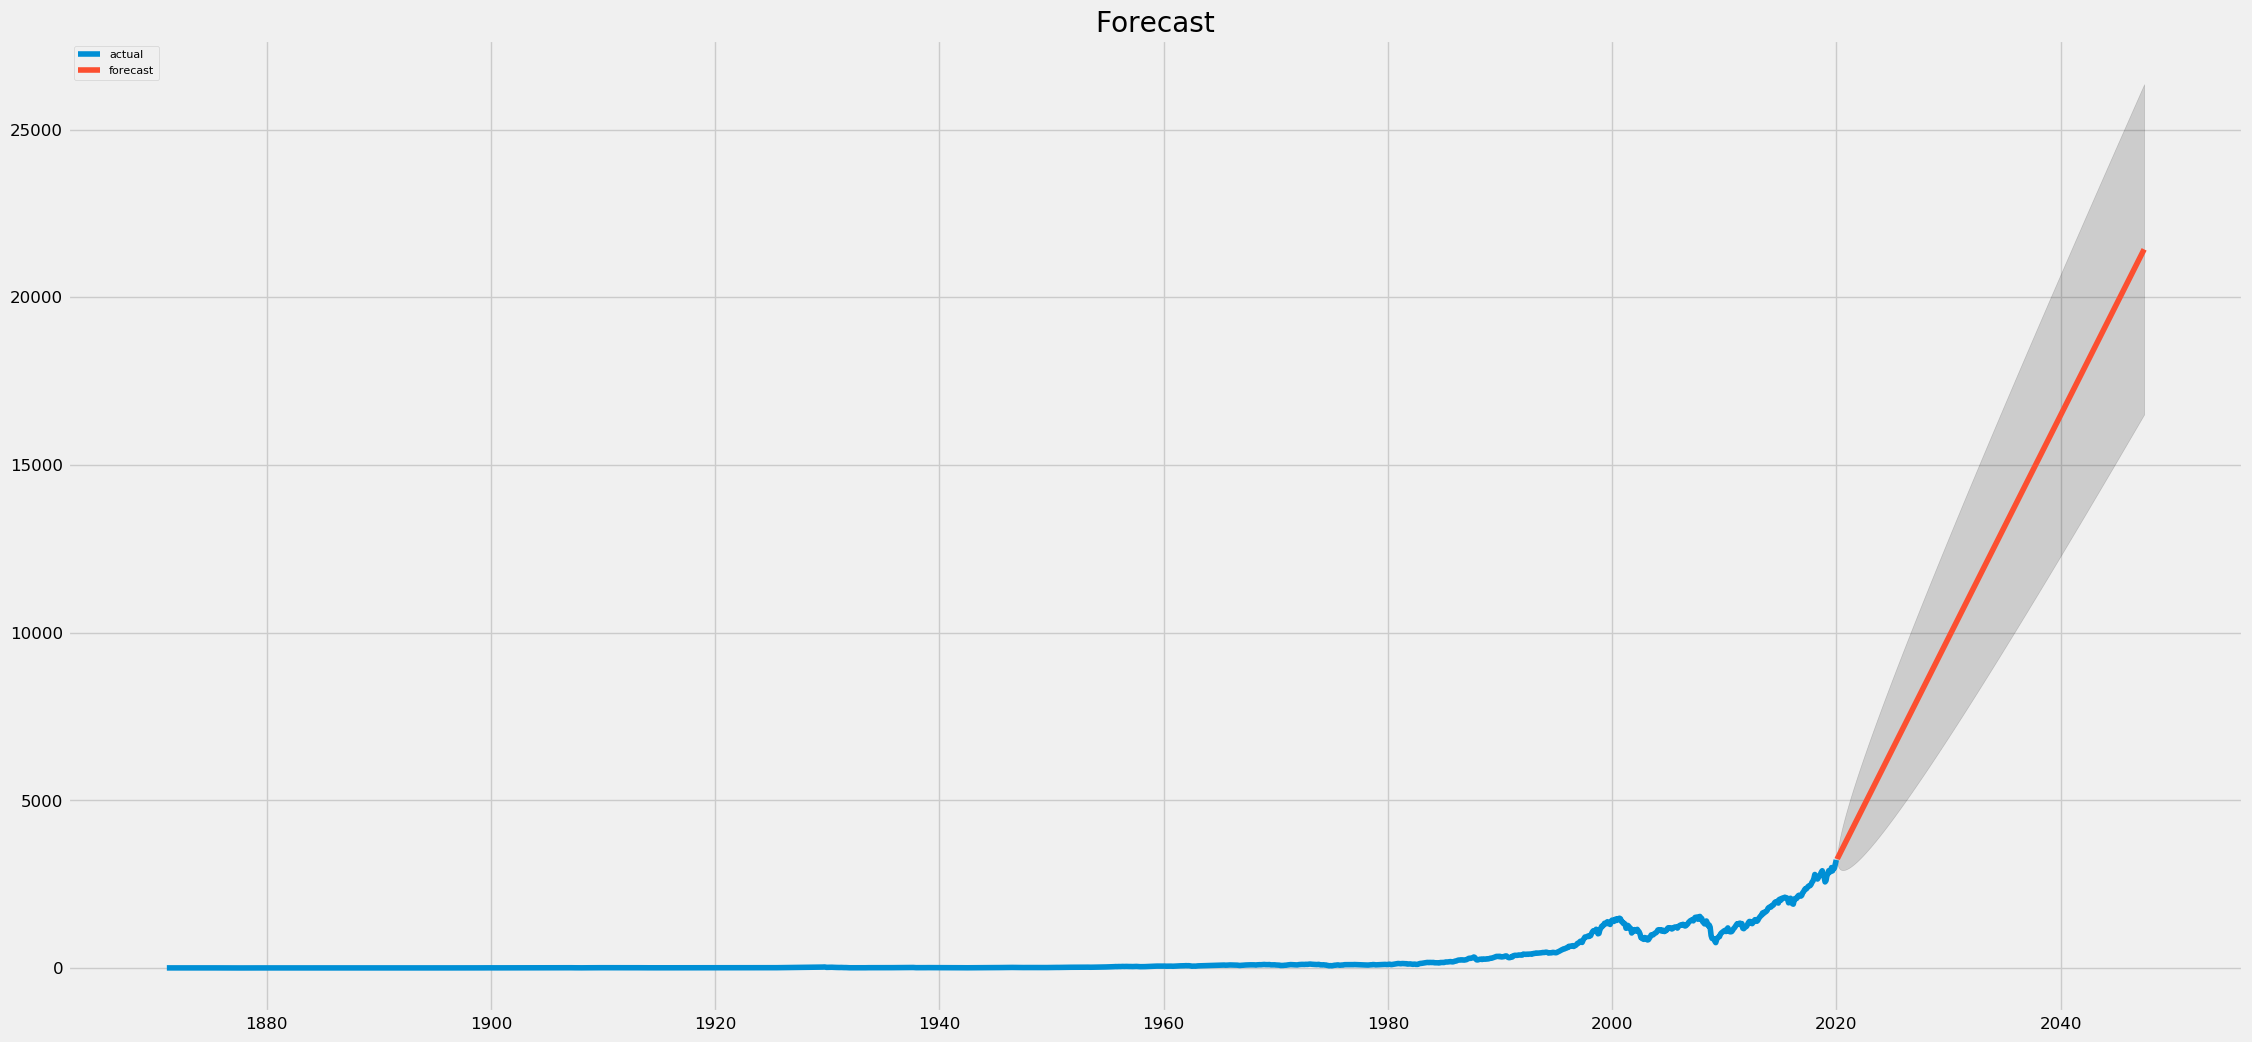

In [33]:
model = ARIMA(df, order=(1, 1, 0))  
fitted = model.fit(disp=-1)  
fc, se, conf = fitted.forecast(10000, alpha=0.05)
periods = 10000
my_index = pd.date_range('2020-01-31', periods=periods, freq='D')
fc_series = pd.Series(fc, index=my_index)
lower_series = pd.Series(conf[:, 0], index=my_index)
upper_series = pd.Series(conf[:, 1], index=my_index)
plt.figure(figsize=(25,12), dpi=100)
plt.plot(df, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [47]:
y_forecasted = fc_series[1]
y_truth = df
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is S&P Composite    9175617.97
dtype: float64


In [48]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is S&P Composite    3029.13
dtype: float64
